In [79]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.draw
from json import load

from PIL import Image, ImageDraw

from matplotlib.path import Path

In [8]:
image_path = '/Users/michael/work/lvivds/parkingslot/images/2018-07-16 07:45:39.024.jpg'
image = skimage.io.imread(image_path)

In [10]:
shape = image.shape[:2]

In [74]:
pklot_config_file = '/Users/michael/work/lvivds/smart-parking-lvds2019/notebooks/pklot_config.json'
pklot_config = load(open(pklot_config_file))
d = pklot_config[0]['annotations'][0]
tupVerts = list(zip([float(px) for px in d['xn'].split(';')], [float(py) for py in d['yn'].split(';')]))

1


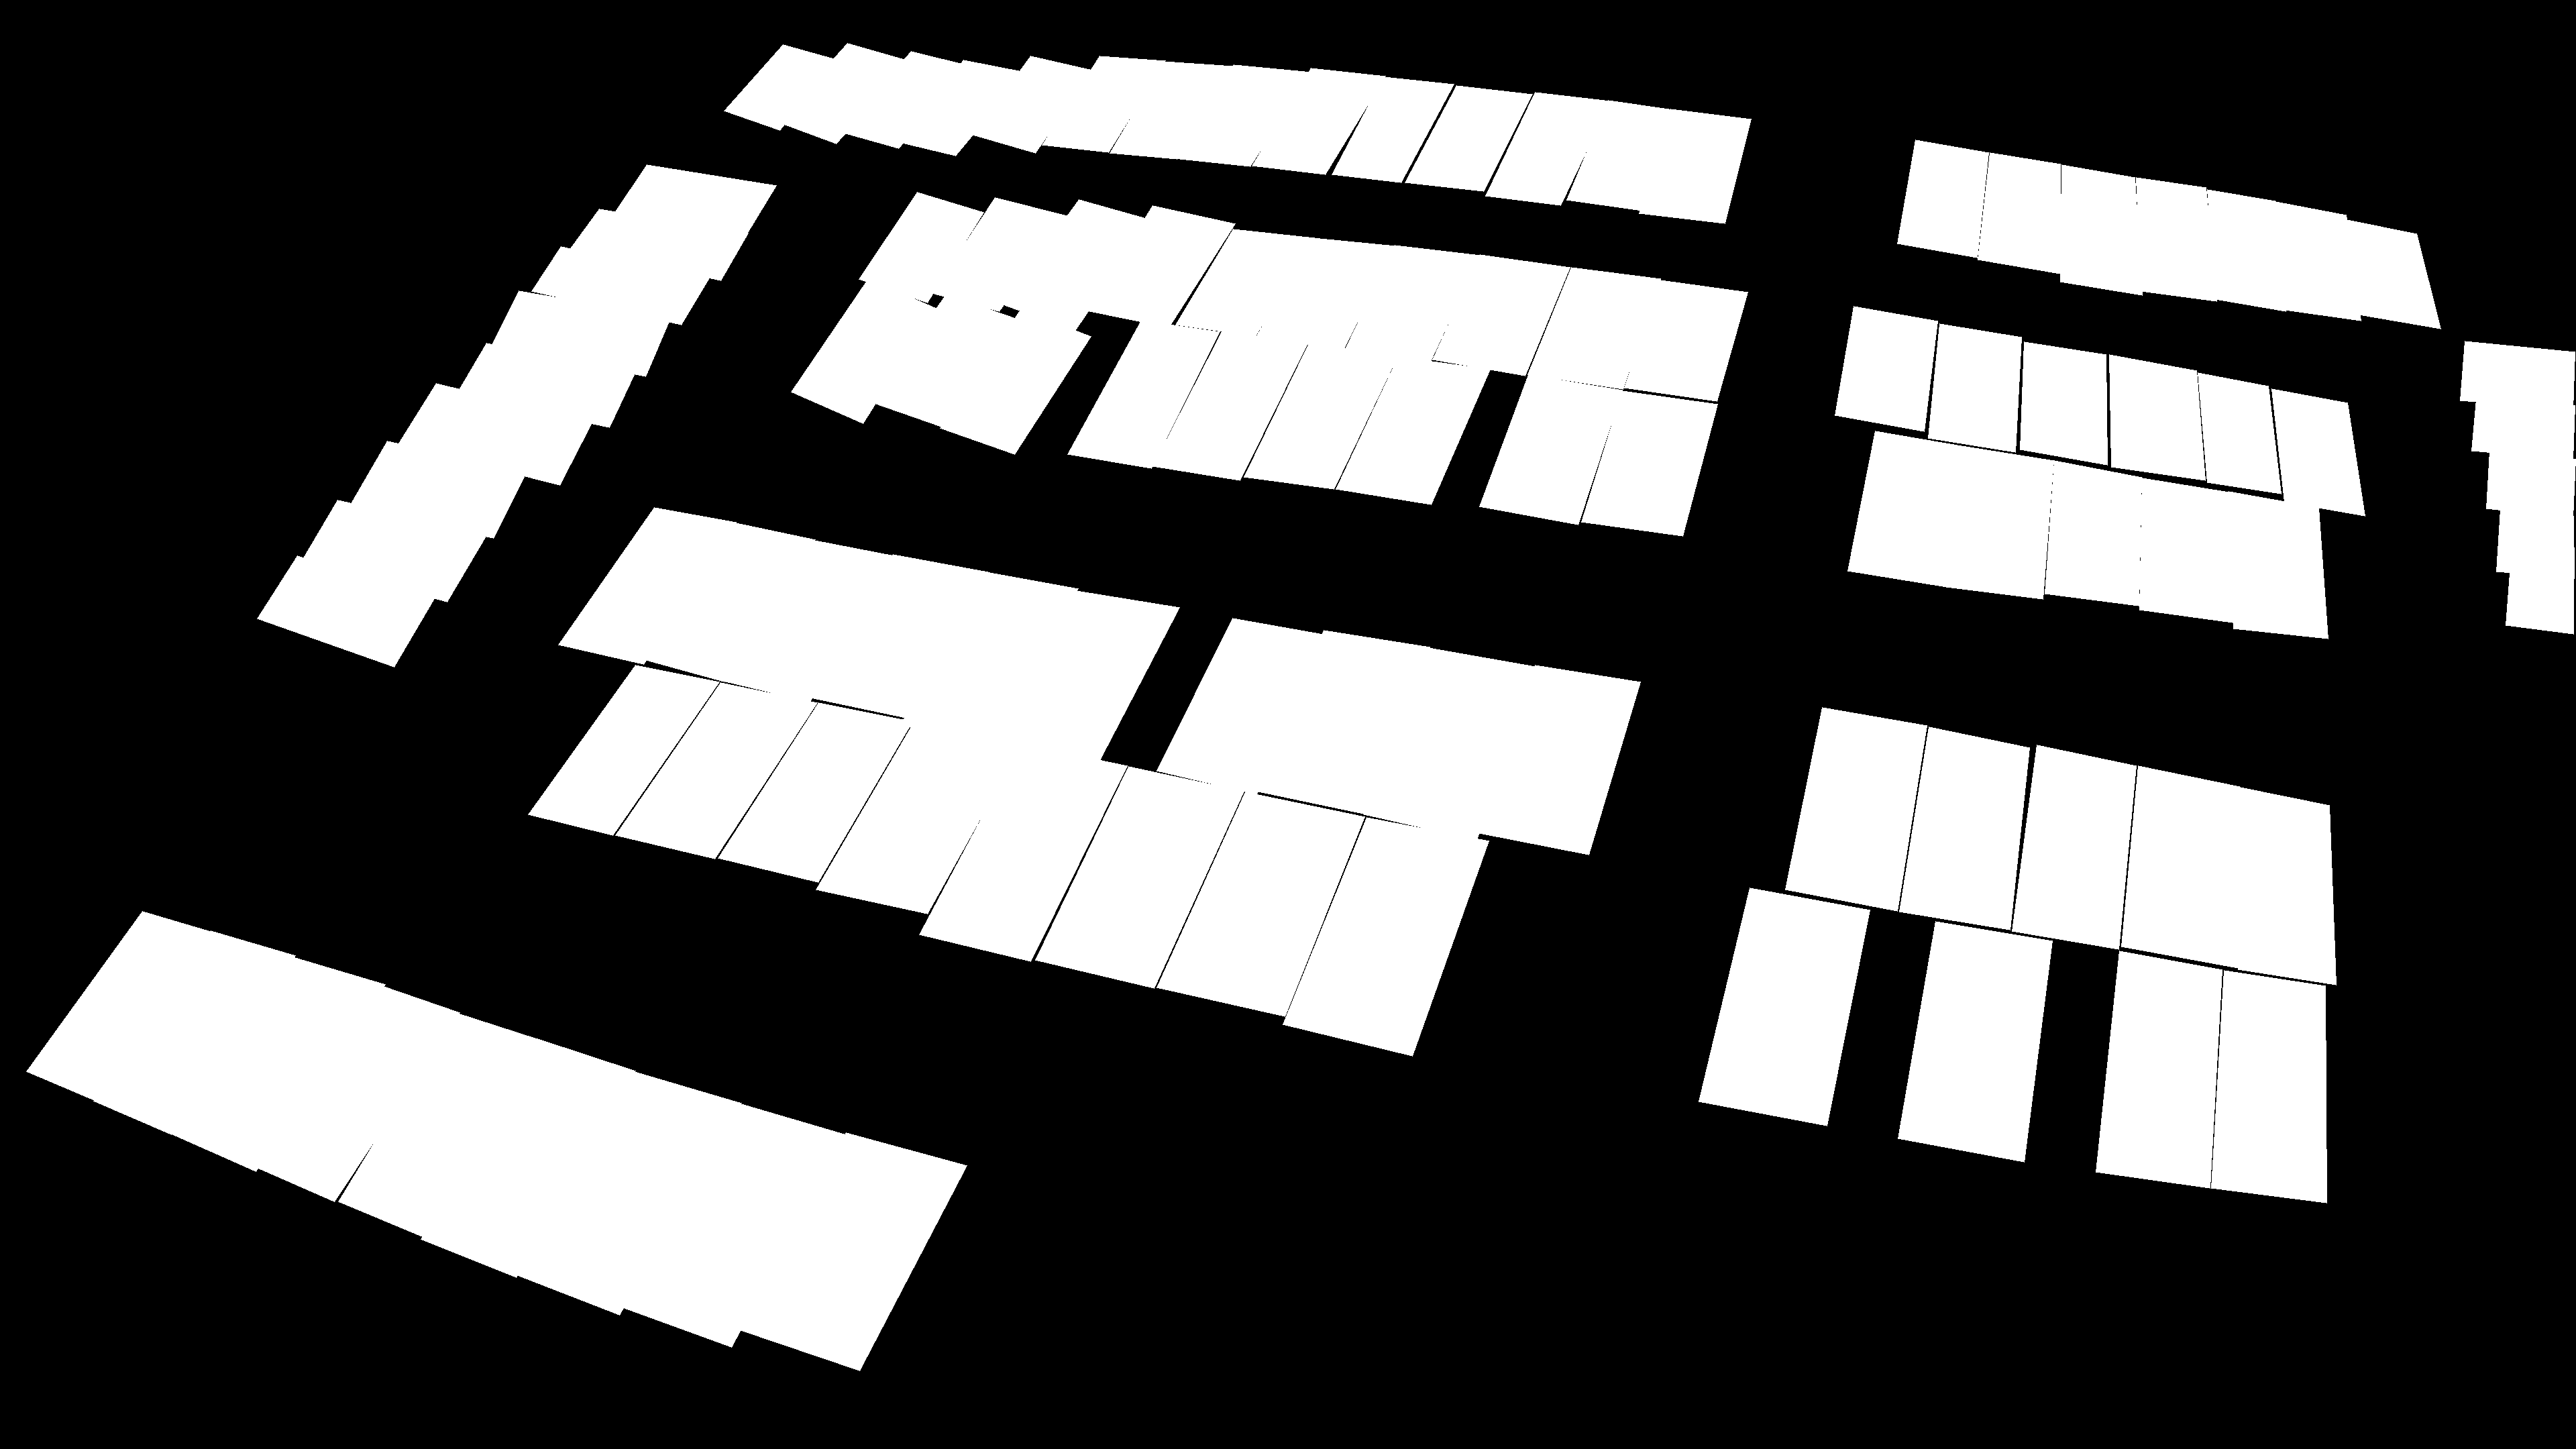

In [100]:
img = Image.new('L', (shape[1], shape[0]), 0)
for d in pklot_config[0]['annotations']:
    tupVerts = list(zip([float(px) for px in d['xn'].split(';')], [float(py) for py in d['yn'].split(';')]))
    ImageDraw.Draw(img).polygon(tupVerts, fill='white')
mask = np.array(img)
img

In [98]:
mask.sum()

9043575

In [101]:
mask.sum()

741921735

In [105]:
img.save('/Users/michael/Downloads/slots_mask.jpg', 'JPEG')

In [103]:
img = Image.fromarray(mask)

In [104]:
img.show()

In [65]:
x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0])) # make a canvas with coordinates
x, y = x.flatten(), y.flatten()
points = np.vstack((x, y)).T

In [66]:
np.array(tupVerts).shape

(4, 2)

In [67]:
points

array([[   0,    0],
       [   1,    0],
       [   2,    0],
       ...,
       [3837, 2159],
       [3838, 2159],
       [3839, 2159]])

In [68]:
Path?

In [69]:
p = Path(np.array(tupVerts))
grid = p.contains_points(points)
mask = grid.reshape(shape[0], shape[1]) # now you have a mask with poi

In [70]:
grid

array([False, False, False, ..., False, False, False])

In [71]:
mask.shape

(2160, 3840)

In [72]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

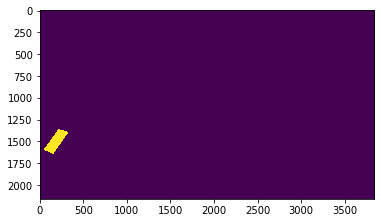

In [73]:
plt.imshow(mask)
plt.show()

In [76]:
mask = skimage.draw.polygon2mask(shape, tupVerts)

AttributeError: module 'skimage.draw' has no attribute 'polygon2mask'

In [77]:
from skimage.

ImportError: cannot import name 'polygon2mask' from 'skimage.draw' (/Users/michael/work/lvivds/smart-parking-lvds2019/runtime/lib/python3.7/site-packages/skimage/draw/__init__.py)